<a href="https://colab.research.google.com/github/ManasviEmmadi/ML_AI_Projects/blob/main/YOLO_using_OpenCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [86]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [87]:
yolo = cv2.dnn.readNet("/content/yolov3-tiny.weights", "/content/yolov3-tiny.cfg.txt")

In [88]:
classes = []

with open("/content/coco.names.txt", "r") as f:
    classes = f.read().splitlines()

In [89]:
len(classes)

80

In [90]:
img = cv2.imread("/content/street.PNG")

blob = cv2.dnn.blobFromImage(img, 1/255, (320, 320), (0,0,0), swapRB=True, crop=False)

In [91]:
blob.shape

(1, 3, 320, 320)

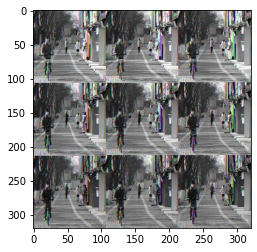

In [92]:
#to print image

i = blob[0].reshape(320,320,3)
plt.imshow(i)

In [93]:
yolo.setInput(blob)

In [94]:
output_layes_name=yolo.getUnconnectedOutLayersNames()
layeroutput = yolo.forward(output_layes_name)

In [95]:
boxes = []
# by what confidence is the array being predicted
confidences = []
class_ids = []

width = img.shape[0]
height = img.shape[1]

for output in layeroutput:
  for detection in output:
    score=detection[5:] # since first 4 boxes give x,y,h,w
    class_id=np.argmax(score)
    confidence=score[class_id]
    # preventing multiple bounding boxes
    if confidence > 0.7:
      center_x = int(detection[0])
      center_x = int(detection[1])
      w = int(detection[2])
      h = int(detection[3])
      # for corners of bounding box
      x=int(center_x-w/2)
      y=int(center_x-h/2)

      boxes.append([x,y,w,h])
      confidences.append(float(confidence))
      class_ids.append(class_id)

In [96]:
len(boxes)

4

In [97]:
indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

In [98]:
font = cv2.FONT_HERSHEY_PLAIN
colors = np.random.uniform(0, 255, size=(len(boxes), 3))

In [99]:
for i in indexes.flatten():
  x,y,w,h = boxes[i]

  label = str(classes[class_ids[i]])
  confi = str(round(confidences[i], 2))
  color = colors[i]

  cv2.rectangle(img, (x,y), (x+w,y+h), color, 4)
  cv2.putText(img, label + " "+confi, (x,y+20), font, 2, (255,255,255), 4)

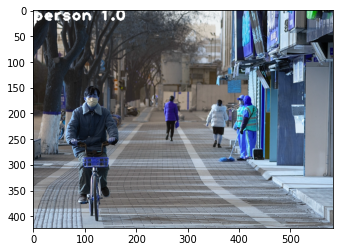

In [102]:
plt.imshow(img)

In [101]:
# saving image to look at bounding boxes clearly
cv2.imwrite("./img.jpg",img)

True